# Logistic Regression (Логистическая регрессия)

Применение алгоритма Логистическая регрессия для решения задачи классификации.


### Датасет
Рассматривать задачу будем на примере известного датасета **Цветки Ириса**

Датасет [Цветки Ириса](https://archive.ics.uci.edu/ml/datasets/iris) содержит 150 записей, каждая из записей содержит 4 признака, т.е. $\boldsymbol x \in \mathbb{R}^4$. 

Что за 4 признака?

0. длина чашелистника, см
1. ширина чашелистника, см
2. длина лепестка, см 
3. ширина лепестка, см 

Метки классов

0. Setosa
1. Versicolour 
2. Virginica

## 0. Импорт библиотек

In [1]:
# программная реализация алгоритма логистическая регрессия
from sklearn.linear_model import LogisticRegression
# программная реализация расчета метрики точности
from sklearn.metrics import accuracy_score
# модуль для разделения выборки на тестовую и обучающую
from sklearn.model_selection import train_test_split

# модуль, позволяющий подтягивать данные по хрестоматийным примерам для ML
from sklearn import datasets

# модули визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# библиотеки для работы с матрицами
import pandas as pd
import numpy as np

## 1. Загружаем данные по цветкам ирисов

Для этого воспользуемся встроенным в библиотеке `scikit-learn` модулем `datasets`

In [2]:
iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# Информация по признакам
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
# Информация по целевой переменной (классам цветка)
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Выведем информацию по размерности датасета и целевой переменной
# чтобы убедиться, что размерности совпадают
print('Размерность признакового пространства {}'.format(iris.data.shape))
print('Размерность вектора целевой переменной {}'.format(iris.target.shape))

Размерность признакового пространства (150, 4)
Размерность вектора целевой переменной (150,)


In [7]:
# Вынесем признаки и целевую перемнную в отдельные переменные
X = iris.data[:, :4] 
y = iris.target

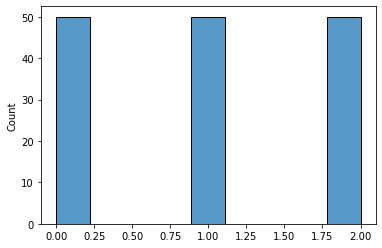

In [8]:
# Посмотрим на гистограмму распределения целевой переменной
sns.histplot(y);

Данные очень хорошо сбалансированы - каждого класса по 50 объектов.

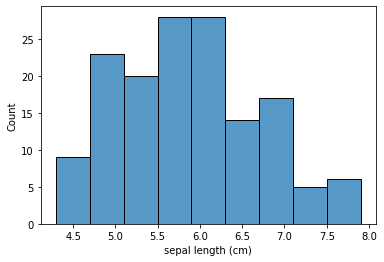

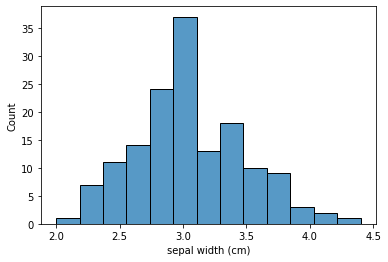

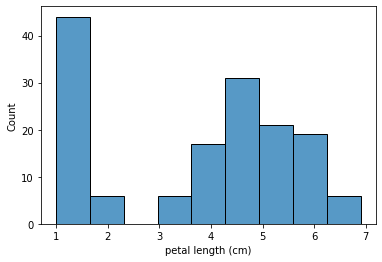

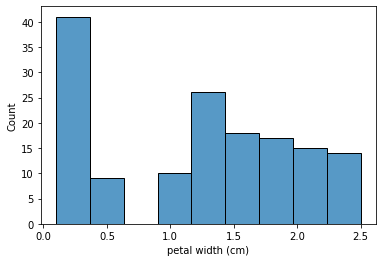

In [9]:
# Посмотрим на распределения признаков
for i in range(4):
    # создадим пустой график (для каждого признака создаем свое полотно)
    plt.figure
    # построим гистограмму для выбранного признака
    sns.histplot(X[:,i]);
    # добавим подпись к оси x
    plt.xlabel(iris.feature_names[i])
    # отобразим график
    plt.show()

In [10]:
# Создадим dataframe на основании исходных данных
# для простоты отображения графиков
iris_df = pd.DataFrame(np.c_[iris.data, iris.target], columns=['sepal length (cm)', 
                                                               'sepal width (cm)', 
                                                               'petal length (cm)',
                                                               'petal width (cm)',
                                                               'class'])

## Матрица Корреляций

Корреляционная матрица показывает взаимосвязи между переменными набора данных.

Корреляционная матрица представляет собой матричную структуру, которая помогает программистую анализировать взаимосвязь между переменными данных. Он представляет собой корреляционное значение между диапазоном 0 и 1.

Положительное значение представляет хорошую корреляцию, и отрицательное значение представляет собой низкую корреляцию и значение, эквивалентное нулю (0), не представляет зависимости между конкретным набором переменных.

Какие выводы можно сделать на основании этой матрицы?
- Найти линейно зависимые признаки;
- Помогает выбрать важные и незначимые переменные набора данных на основании линейной зависимости/независимости с целевой переменной.

>Матрица корреляций применима только к числовым/непрерывным переменным.

In [11]:
# для получения матрицы корреляций можно воспользоваться функцией corr для объекта DataFrame
corr_matrix = iris_df.corr()
print(corr_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
class                       0.782561         -0.426658           0.949035   

                   petal width (cm)     class  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
class                      0.956547  1.000000  


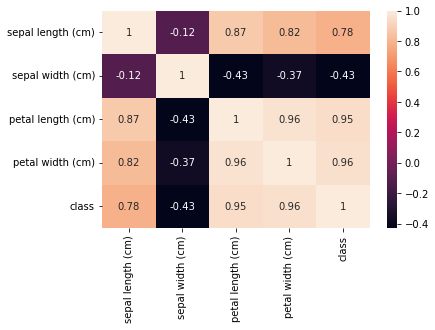

In [12]:
# для наглядного отображения воспользуемся библиотекой seaborn
sns.heatmap(corr_matrix, annot=True);

# 2. Обучение модели

In [13]:
# Разбиение на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
# Создадим объект класса LogosticRegression
classifier_LR = LogisticRegression(random_state=21, max_iter=1000, multi_class='multinomial')

# Обучение модели
classifier_LR.fit(X_train, y_train)

# Прогноз
y_pred = classifier_LR.predict(X_test)

In [15]:
# Выведем точность модели
print('Accuracy: {:.2f}'.format(classifier_LR.score(X_test, y_test)))

Accuracy: 0.97


Как мы говороли на лекции, логистическая регрессия - линейный алгоритм классификации, который ищет веса коэффициентов для признаков. Т.к. мы решаем задачу мультклассификации, то в используемой реализации `sklearn` веса представляют собой не просто вектор размерности (1,4), а (3,4), т.е. для каждого класса отдельно считается его принадлежность. Для просмотра коэффициентов, необходимо воспользоваться функцией `coef_` 

In [16]:
classifier_LR.coef_

array([[-0.41452706,  0.84926829, -2.33262725, -0.98887317],
       [ 0.52086599, -0.29394738, -0.21689938, -0.71377827],
       [-0.10633893, -0.55532091,  2.54952664,  1.70265144]])

> # Задание
>
> При помощи GridSearchCV выбрать наиболее оптимальный набор параметров для C из множества (0.001, 0.01, 0.1, 1, 10) и для penalty из множества ('l1','l2'). Ниже дана справка по тому, что за параметры l1 и l2, C и какой функцией можно реализовать перебор параметров. Необходимо определить, какой метод регуляризации наиболее применим для выбранных данных и насколько необходимо "подстраиваться" под линейно неразделимые точки. В качестве ответа нужно указать какой тип регуляризации наиболее оптимален. Во втором поле ответа необходимо указать какое количество весовых коэффициентов было обнулено.

### Параметр штрафа `C`
Параметр `C` компенсирует неправильную классификацию обучающих примеров простотой поверхности принятия решений.


### l1 и l2 регуляризация
Регуляризация - метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение. Эта информация часто имеет вид штрафа за сложность модели. Например, это могут быть ограничения гладкости результирующей функции или ограничения по норме векторного пространства.

Основные виды регуляризации:

$L_{1}$-регуляризация (англ. lasso regression), или регуляризация через манхэттенское расстояние:

$$L_{1}=\sum _{i}{(y_{i}-y(t_{i}))}^{2}+\lambda \sum _{i}{|a_{i}|}$$

$L_{2}$- регуляризация, или регуляризация Тихонова (в англоязычной литературе — ridge regression или Tikhonov regularization), для интегральных уравнений позволяет балансировать между соответствием данным и маленькой нормой решения:

$$L_{2}=\sum _{i}{(y_{i}-y(t_{i}))}^{2}+\lambda \sum _{i}{a_{i}}^{2}$$

$L_1$-регуляризация реализует это путём отбора наиболее важных факторов, которые сильнее всего влияют на результат. Для простоты можете считать, что факторы с малой величиной влияния на конечный результат фактически «помогают» вам предсказывать лишь шум в наборе обучающих данных. $L_2$ -регуляризация предотвращает переобучения модели путём запрета на непропорционально большие весовые коэффициенты.

При $L_2$-регуляризации дополнительный член является квадратичной функцией, при $L_1$-регуляризации – модулем.

Как мы уже говорили, машинное обучение это про решение задачи оптимизации, а это как следствие, обычно приводит нас к поиску производной. При квадратичном члене, чем ближе к нулю, тем меньшей становится производная, пока также не приблизится к нулю. Поэтому при $L_2$-регуляризации, когда оптимизируемая величина уже мала, дальнейший градиентный спуск её сильно не изменит. В случае модуля производная является константой с абсолютной величиной, равной единице. Формально в нуле она не определена, но мы считаем её также равной нулю. Поэтому при $L_1$-регуляризации градиентный спуск будет стремиться к нулю с постоянной скоростью, а достигнув его, там и останется. Вследствие этого $L_2$-регуляризация способствует малой величине весовых коэффициентов, а $L_1$-регуляризация способствует их равенству нулю, тем самым провоцируя разрежённость.

### GridSearchCV

У каждого из алгоритмов есть определенный набор параметров, которые необходимо подобрать в процессе обучения модели. Но как оптимальнее всего автоматизировать этот процесс? Первое, что приходит в голову, это использовать циклы, внутри которых будем перебирать различные параметры модели. Но каждый раз описывать эти циклы довольно рутинно и неинтересно. Именно поэтому в библиотеке `Scikit-Learn` рализован инструмент перебора параметров, который называется `GridSearchCV`.
`GridSearchCV` – это очень мощный инструмент для автоматического подбора параметров для моделей машинного обучения. `GridSearchCV` находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров. Также есть `RandomSearchCV` - это когда мы перебираем не по полной сетке возможных комбинаций параметров, а случайным образом выбираем комбинации и обучаем модели на них. Магические буквы `CV` - это кросс-валидация, пока параметр, отвечающий за этот функционал мы просто оставим равным 3, далее в лекциях поговорим что это такое и как с этим работать.

In [18]:
# импорт нужного модуля для поиска параметров
from sklearn.model_selection import GridSearchCV

# создадим словарь для перебора параметров
parameters = {
    'C':[0.001, 0.01, 0.1, 1],
    'penalty':['l1','l2'],
}

# создадим объект модели 
classifier_logreg = LogisticRegression(
    random_state=21, 
    max_iter=10000, 
    multi_class='multinomial', 
    solver='saga'
)

# создадим объект GridSearchCV
clf=GridSearchCV(classifier_logreg, param_grid=parameters, cv=3)

# обучение модели по сетке гиперпараметров
clf.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000,
                                          multi_class='multinomial',
                                          random_state=21, solver='saga'),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l1', 'l2']})

In [19]:
# Для вывода параметров наилучшей модели можно воспользоваться
# best_params_
print(clf.best_params_)

# Для вывода лучшей метрики best_score_
print("accuracy :",clf.best_score_)

{'C': 1, 'penalty': 'l1'}
accuracy : 0.9466571834992887


In [20]:
# Для обращения к лучшей модели best_estimator_
# При помощи coef_ можно получить матрицу коэффициентов модели
clf.best_estimator_.coef_

array([[ 0.        ,  0.        , -3.38312934,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-1.11715279,  0.        ,  4.0967125 ,  2.21111193]])